In [1]:
import pandas as pd

data = pd.read_csv('../data/clean_weather.csv')
data.head(3)

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0


In [2]:
data = data.ffill()

In [3]:
data.isna().sum()

Unnamed: 0       0
tmax             0
tmin             0
rain             0
tmax_tomorrow    0
dtype: int64

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

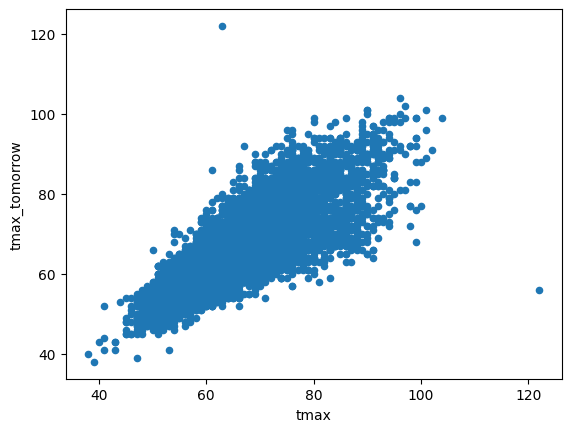

In [4]:
data.plot.scatter("tmax", "tmax_tomorrow")

In [5]:
data.corr(numeric_only=True)

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


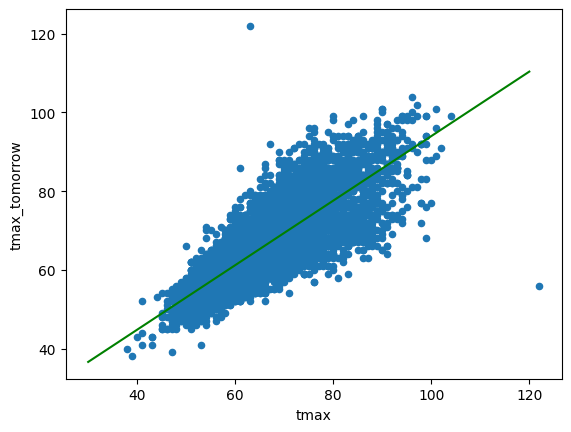

In [6]:
import matplotlib.pyplot as plt

data.plot.scatter("tmax", "tmax_tomorrow")

prediction = lambda x, w1=0.82, b=11.99: x * w1 + b

plt.plot([30, 120], [prediction(30), prediction(120)], 'green')

In [7]:
import numpy as np


def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

In [8]:
print(mse(data["tmax_tomorrow"], prediction(data["tmax"])))
print(mse(data["tmax_tomorrow"], prediction(data["tmax"], 0.82, 13)))

22.897335324598416
24.118285439336727


In [9]:
tmax_bins = pd.cut(data["tmax"], 25)

In [10]:
tmax_bins

0        (58.16, 61.52]
1         (51.44, 54.8]
2         (51.44, 54.8]
3         (51.44, 54.8]
4         (51.44, 54.8]
              ...      
13504    (61.52, 64.88]
13505    (64.88, 68.24]
13506    (64.88, 68.24]
13507     (68.24, 71.6]
13508    (61.52, 64.88]
Name: tmax, Length: 13509, dtype: category
Categories (25, interval[float64, right]): [(37.916, 41.36] < (41.36, 44.72] < (44.72, 48.08] < (48.08, 51.44] ... (108.56, 111.92] < (111.92, 115.28] < (115.28, 118.64] < (118.64, 122.0]]

In [11]:
ratios = (data["tmax_tomorrow"] - 11.99) / data["tmax"]
binned_ratio = ratios.groupby(tmax_bins).mean()
binned_ratio

C:\Users\moham\AppData\Local\Temp\ipykernel_9392\159777238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = ratios.groupby(tmax_bins).mean()


tmax
(37.916, 41.36]     0.773904
(41.36, 44.72]      0.762256
(44.72, 48.08]      0.798484
(48.08, 51.44]      0.805470
(51.44, 54.8]       0.803930
(54.8, 58.16]       0.802731
(58.16, 61.52]      0.812934
(61.52, 64.88]      0.821545
(64.88, 68.24]      0.829101
(68.24, 71.6]       0.830022
(71.6, 74.96]       0.825879
(74.96, 78.32]      0.822207
(78.32, 81.68]      0.804168
(81.68, 85.04]      0.800264
(85.04, 88.4]       0.769633
(88.4, 91.76]       0.796350
(91.76, 95.12]      0.798793
(95.12, 98.48]      0.800002
(98.48, 101.84]     0.771846
(101.84, 105.2]     0.805621
(105.2, 108.56]          NaN
(108.56, 111.92]         NaN
(111.92, 115.28]         NaN
(115.28, 118.64]         NaN
(118.64, 122.0]     0.360738
dtype: float64

C:\Users\moham\AppData\Local\Temp\ipykernel_9392\3084527768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_tmax = data["tmax"].groupby(tmax_bins).mean()


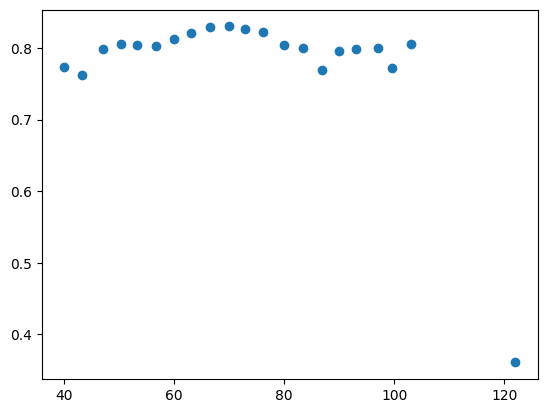

In [12]:
binned_tmax = data["tmax"].groupby(tmax_bins).mean()
plt.scatter(binned_tmax, binned_ratio)

## Relu

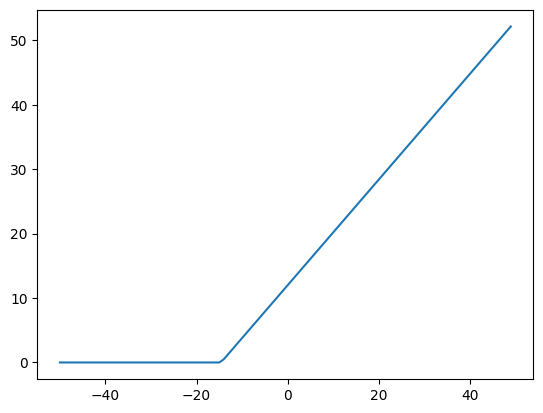

In [13]:
temps = np.arange(-50, 50)

plt.plot(temps, np.maximum(0, prediction(temps)))

## y = w2 * relu( w1 * x + b1) + b2

## y = 0.5 * relu(prediction) + 10

(0.0, 40.0)

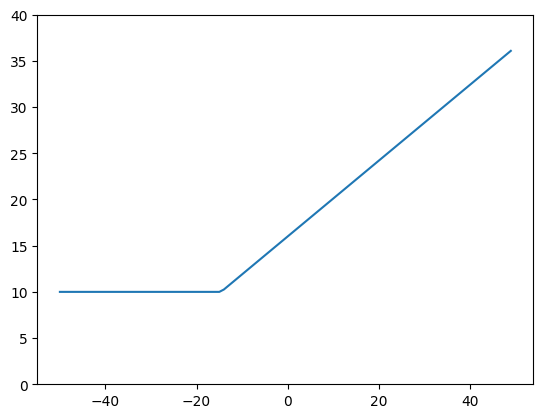

In [14]:
temps = np.arange(-50, 50)
layer1 = np.maximum(0, prediction(temps))
layer2 = prediction(layer1, .5, 10)

plt.plot(temps, layer2)

plt.ylim((0, 40))

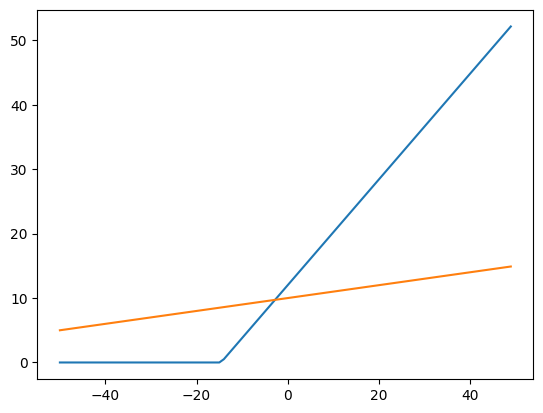

In [15]:
layer1_1 = np.maximum(0, prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, .1, 10))

plt.plot(temps, layer1_1)
plt.plot(temps, layer1_2)

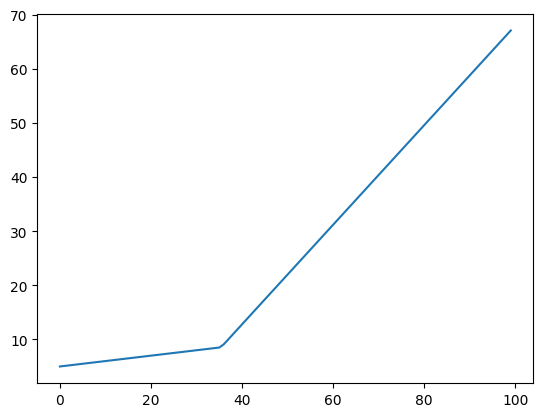

In [16]:
plt.plot(layer1_1 + layer1_2)

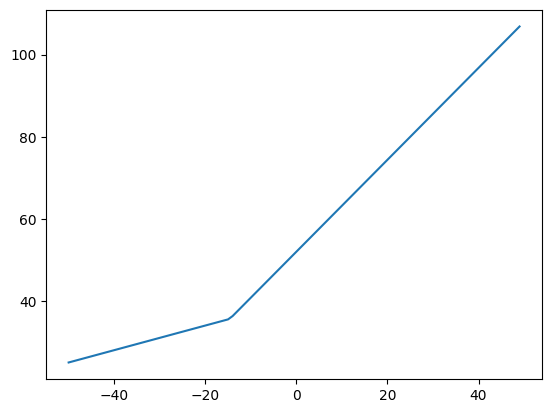

In [17]:
layer1_1 = np.maximum(0, prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, .1, 10))

layer1_3 = np.maximum(0, prediction(temps, .2, 30))

plt.plot(temps, layer1_1 + layer1_2 + layer1_3)

### Adding Layer 2

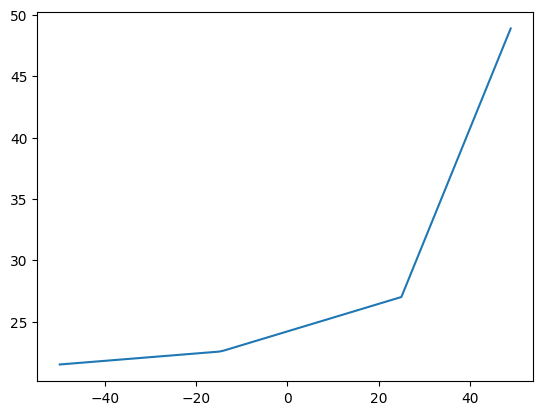

In [18]:
layer1_1 = np.maximum(0, prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, .1, 10))

layer1_3 = np.maximum(0, prediction(temps, 2, -50))

layer2 = layer1_1 * .1 + layer1_2 * .3 + layer1_3 * .4 + 20

plt.plot(temps, layer2)

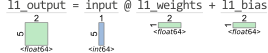

In [19]:
import tsensor

input = np.array([[80], [90], [100], [-20], [-10]])

l1_weights = np.array([[.82, .1]])

l1_bias = np.array([[11.9, 10]])

with tsensor.explain():
    l1_output = input @ l1_weights + l1_bias


In [20]:
l1_output

array([[77.5, 18. ],
       [85.7, 19. ],
       [93.9, 20. ],
       [-4.5,  8. ],
       [ 3.7,  9. ]])

In [21]:
l1_actviated = np.maximum(l1_output, 0)
l1_actviated

array([[77.5, 18. ],
       [85.7, 19. ],
       [93.9, 20. ],
       [ 0. ,  8. ],
       [ 3.7,  9. ]])

### Layer 2

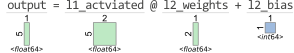

In [22]:
l2_weights = np.array([
    [.5],
    [.2]
])

l2_bias = np.array([[5]])

with tsensor.explain():
    output = l1_actviated @ l2_weights + l2_bias

In [23]:
output

array([[47.35],
       [51.65],
       [55.95],
       [ 6.6 ],
       [ 8.65]])

### Use Nueral Networks

In [24]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

In [25]:
tmax

array([[ 80],
       [ 90],
       [100],
       [-20],
       [-10]])

In [26]:
tmax_tomorrow

array([[ 83],
       [ 89],
       [ 95],
       [-22],
       [ -9]])

In [27]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

In [28]:
mse(tmax_tomorrow, output)

array([[1270.9225],
       [1395.0225],
       [1524.9025],
       [ 817.96  ],
       [ 311.5225]])

In [29]:
def mse_grad(actual, predicted):
    return predicted - actual

In [30]:
mse_grad(tmax_tomorrow, output)

array([[-35.65],
       [-37.35],
       [-39.05],
       [ 28.6 ],
       [ 17.65]])

### Calculate Gradient

In [31]:
output_gradient = mse_grad(tmax_tomorrow, output)
output_gradient

array([[-35.65],
       [-37.35],
       [-39.05],
       [ 28.6 ],
       [ 17.65]])

l2_weight is:  [0.5 0.2]
l2_weight shape is:  (2, 1)


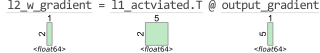

array([[-9565.26],
       [-1744.7 ]])

In [32]:
from tsensor import explain as exp

# output = l1_actviated @ l2_weights + l2_bias
print(f"l2_weight is: ", l2_weights.flatten())
print(f"l2_weight shape is: ", l2_weights.shape)
with exp():
    l2_w_gradient = l1_actviated.T @ output_gradient

l2_w_gradient

### Check derivateve with sympy

In [33]:
#l1_output = input @ l1_weights + l1_bias
# l1_actviated = l1_output
# output = l1_actviated @ l2_weights + l2_bias


from sympy import diff, symbols

x, w = symbols('X, W')
sympy_output = x * w
diff(sympy_output, w)

X

### Derivative of Bias

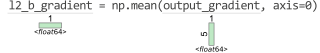

array([-13.16])

In [34]:
with exp():
    l2_b_gradient = np.mean(output_gradient, axis=0)

l2_b_gradient

In [35]:
l2_weights

array([[0.5],
       [0.2]])

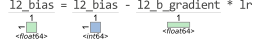

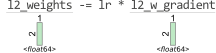

array([[0.5956526],
       [0.217447 ]])

In [37]:
lr = 1e-5

with exp():
    # l2_bias -= lr * l2_b_gradient
    l2_bias = l2_bias - l2_b_gradient * lr
    l2_weights -= lr * l2_w_gradient

l2_weights

### L1 Gradient

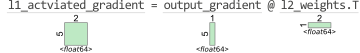

array([[-21.23501519,  -7.75198555],
       [-22.24762461,  -8.12164545],
       [-23.26023403,  -8.49130535],
       [ 17.03566436,   6.2189842 ],
       [ 10.51326839,   3.83793955]])

In [40]:
#l1_output = input @ l1_weights + l1_bias
# l1_actviated = Relu(l1_output)
# output = l1_actviated @ l2_weights + l2_bias

with exp():
    l1_actviated_gradient = output_gradient @ l2_weights.T

l1_actviated_gradient

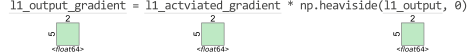

[[-21.23501519  -7.75198555]
 [-22.24762461  -8.12164545]
 [-23.26023403  -8.49130535]
 [ 17.03566436   6.2189842 ]
 [ 10.51326839   3.83793955]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]]


array([[-21.23501519,  -7.75198555],
       [-22.24762461,  -8.12164545],
       [-23.26023403,  -8.49130535],
       [  0.        ,   6.2189842 ],
       [ 10.51326839,   3.83793955]])

In [45]:
with exp():
    l1_output_gradient = l1_actviated_gradient * np.heaviside(l1_output, 0)

print(l1_actviated_gradient)
print(np.heaviside(l1_output, 0))
l1_output_gradient

### L1 Gradients

In [47]:
l1_w_gradient = input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

In [48]:
l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

In [49]:
l1_weights

array([[0.88132244, 0.12362997]])

In [50]:
l1_bias

array([[11.90011246, 10.00002862]])

### Train Data

In [51]:
import numpy as np
from sklearn.preprocessing import StandardScaler

PREDICTIONS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

scaler = StandardScaler()
data[PREDICTIONS] = scaler.fit_transform(data[PREDICTIONS])

In [53]:
split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTIONS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

G:\Apply\Deep_Learning_Review\.venv\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [59]:
def init_layers(inputs):
    layers = list()
    for i in range(1, len(inputs)):
        layers.append([
            np.random.rand(inputs[i - 1], inputs[i]) / 5 - .1,
            np.ones((1, inputs[i]))
        ])
    return layers


layer_conf = [3, 10, 10, 1]
layers = init_layers(layer_conf)

In [68]:
layers[1][0].shape

(10, 10)

In [69]:
def forward(batch, layers):
    hiddens = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
        hiddens.append(batch.copy())
    return batch, hiddens

In [70]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)


def mse_grad(actual, predicted):
    return predicted - actual

In [76]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers) - 1, -1, -1):  #from last layer to the first layer
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i + 1], 0))

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0)

        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr

        grad = grad @ layers[i][0].T
    return layers

In [78]:
lr = 1e-6
epochs = 10
batch_size = 8

layers = init_layers(layer_conf)

for epoch in range(epochs):
    epoch_loss = 0

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i: (i + batch_size)]
        y_batch = train_y[i: (i + batch_size)]

        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)

        epoch_loss += np.mean(loss ** 2)

        layers = backward(layers, hidden, loss, lr)

    valid_preds, _= forward(valid_x, layers)
    print(f"Epoch: {epoch} Train MSE: {epoch_loss / (train_x.shape[0] / batch_size)} Valid MSE: {np.mean(mse(valid_preds,valid_y))}")

Epoch: 0 Train MSE: 3323.1746418833022 Valid MSE: 1742.1966506924261
Epoch: 1 Train MSE: 359.6428910751258 Valid MSE: 26.36986383986144
Epoch: 2 Train MSE: 23.435748013319525 Valid MSE: 21.365513344565777
Epoch: 3 Train MSE: 22.48217781775068 Valid MSE: 20.867653015930433
Epoch: 4 Train MSE: 22.204171543081067 Valid MSE: 20.763125832089045
Epoch: 5 Train MSE: 22.131585530426722 Valid MSE: 20.745520572684413
Epoch: 6 Train MSE: 22.11142000894054 Valid MSE: 20.74488486155719
Epoch: 7 Train MSE: 22.104525817322962 Valid MSE: 20.746515372470025
Epoch: 8 Train MSE: 22.10114636529716 Valid MSE: 20.747718548481906
Epoch: 9 Train MSE: 22.098866335545456 Valid MSE: 20.74812120365711


In [79]:
pred, _ = forward(test_x, layers)
np.mean(mse(test_y, pred))

np.float64(22.042729603386352)